In [80]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import auc, roc_curve,roc_auc_score
from sklearn.linear_model import LinearRegression
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
except:
    !pip install matplotlib
    !pip install nbformat
    !pip install seaborn
    import matplotlib.pyplot as plt
    import seaborn as sns



In [81]:
replicate_jtt = True # add baselin
replicate_failure_direction = True # add baseline

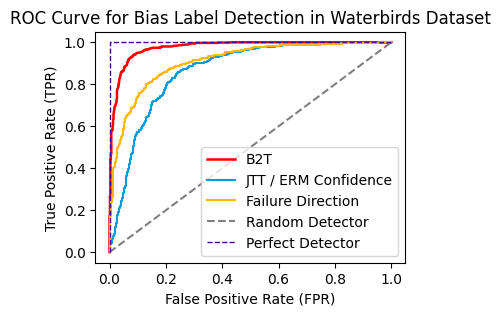

In [153]:
dataset = "waterbird" 
dataset__ = "waterbirds"

########## B2T DATA
# loads simiarities for every image to every keyword in waterbird class set
probs_targets_csv_path = "pseudo_bias/figure_5_data_"+dataset+".csv"
if not os.path.exists("b2t/b2t_debias/"+probs_targets_csv_path):

    data_dir = "../data" # cd  into debias so need parent
        
    save_path = probs_targets_csv_path

    # Format the command string using the variables
    command = f"""
    cd b2t/b2t_debias && \
    python infer_group_label_edited.py \
        --data_dir "{data_dir}" \
        --dataset "{dataset__}" \
        --save_path "{save_path}"
    """

    # Execute the command in Colab
    !pipenv run bash -c "{command}"

df_probs = pd.read_csv("b2t/b2t_debias/" + probs_targets_csv_path)
cols = ["col_1","col_2","Target","Target_Spurious"]
df_probs = df_probs[cols]

########## B2T DATA


########### ADDING BASELINE

logits_path = "result/" + "raw_logits" +"_"+ dataset  + ".csv"
if replicate_jtt and ( not os.path.exists("b2t/"+logits_path) ):
    # Format the command string using the variables
    
    model_path = "best_model_"+dataset__.capitalize()[0] + dataset__[1:] +"_erm.pth"
    command = f"""
    cd b2t/result && \
    python extract_raw_logits.py \
        --dataset "{dataset}" \
        --model "{model_path}" \

    """

    # Execute the command in Colab
    !pipenv run bash -c "{command}"



############ ADDING BASELINE

########### ADDING BASELINE
failure_path = "result/" + "failure_direction" +"_"+ dataset  + ".csv"
if replicate_failure_direction and ( not os.path.exists("b2t/"+failure_path) ):
    # Format the command string using the variables
    
    model_path = "best_model_"+dataset__.capitalize()[0] + dataset__[1:] +"_erm.pth"
    command = f"""
    cd b2t/result && \
    python failure_direction_fig_5.py \
        --dataset "{dataset}" \
        --model "{model_path}" \

    """

    # Execute the command in Colab
    !pipenv run bash -c "{command}"

########### ADDING BASELINE


# waterbird with land background, so target is 1 (waterbird class) and col_1 (1-indexed) as thats probability of assigning spurious label 0 (land background)
df_waterbirds = df_probs[df_probs["Target"] == 1]

#colors = ["#1f77b4", "#ff7f0e","#2ca02c", "#d62728", "#9467bd"]
inverted_labels = (df_waterbirds["Target_Spurious"] -1 ) * -1       # landbird is 0 in spurious but for ROC needs to be Ground truth
fpr, tpr, _ = roc_curve(inverted_labels, df_waterbirds["col_1"])

# Plot ROC curves
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label="B2T", color="red", linewidth=1.8)

if replicate_jtt:
    logits_df = pd.read_csv("b2t/"+logits_path)
    logits_df = logits_df[logits_df["actual"] == 1] # same as above
    erm_confidence = logits_df["logit_0"] # logit_0 gives probability of assigning landbird class, whilst we have filtered for waterbird class being actual -> mispredict, which is bias data points in JTT paper
    fpr_erm, tpr_erm, _ = roc_curve(inverted_labels , erm_confidence)
    plt.plot(fpr_erm, tpr_erm, label="JTT / ERM Confidence", color="#029cdf")


if replicate_failure_direction:
    failure_df = pd.read_csv("b2t/"+failure_path)
    failure_df = failure_df[failure_df["actual"] == 1] # same as above
    svm_score = failure_df["svm_score"] # gives score if our model would correctly classify, so opposite of spurious label
    regular_labels = failure_df["spurious"] # no need to invert here since we're essentially predicting the opposite already
    fpr_erm, tpr_erm, _ = roc_curve(regular_labels , svm_score)
    plt.plot(fpr_erm, tpr_erm, label="Failure Direction", color="#ffb902")


# Add perfect predictor
plt.plot([0, 1], [0, 1], '--', color="gray", label='Random Detector')  # Diagonal line for reference
plt.plot([0, 0, 1], [0, 1, 1], '--', color="indigo", label='Perfect Detector',lw=1)  # Perfect predictor line
plt.title(f'ROC Curve for Bias Label Detection in Waterbirds Dataset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(title='', loc="lower right")
plt.grid(False)
plt.savefig("b2t/plots/roc_bias_curve_waterbirds.png", dpi=200, bbox_inches='tight')
plt.show()

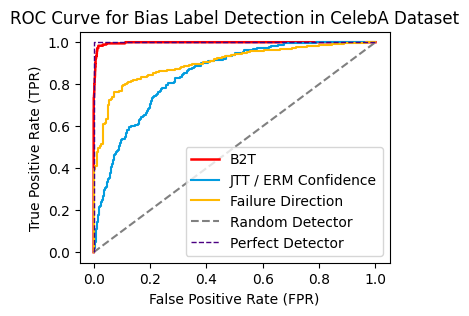

In [152]:
dataset = "celeba" 
dataset__ = "celeba"

########## B2T DATA
# loads simiarities for every image to every keyword in waterbird class set
probs_targets_csv_path = "pseudo_bias/figure_5_data_"+dataset+".csv"
if not os.path.exists("b2t/b2t_debias/"+probs_targets_csv_path):

    data_dir = "../data" # cd  into debias so need parent
        
    save_path = probs_targets_csv_path

    # Format the command string using the variables
    command = f"""
    cd b2t/b2t_debias && \
    python infer_group_label_edited.py \
        --data_dir "{data_dir}" \
        --dataset "{dataset__}" \
        --save_path "{save_path}"
    """

    # Execute the command in Colab
    !pipenv run bash -c "{command}"

df_probs = pd.read_csv("b2t/b2t_debias/" + probs_targets_csv_path)
cols = ["col_1","col_2","Target","Target_Spurious"]
df_probs = df_probs[cols]
########## B2T DATA


########### ADDING BASELINE

logits_path = "result/" + "raw_logits" +"_"+ dataset  + ".csv"
if replicate_jtt and (not os.path.exists("b2t/"+logits_path) ):

    # Format the command string using the variables
    model_path = "best_model_"+dataset__.capitalize()[0] + dataset__[1:-1] + dataset__[-1].capitalize()  +"_erm.pth"
    
    command = f"""
    cd b2t/result && \
    python extract_raw_logits.py \
        --dataset "{dataset}" \
        --model "{model_path}" \

    """

    # Execute the command in Colab
    !pipenv run bash -c "{command}"


########### ADDING BASELINE

########### ADDING BASELINE
failure_path = "result/" + "failure_direction" +"_"+ dataset  + ".csv"
if replicate_failure_direction and ( not os.path.exists("b2t/"+failure_path) ):
    # Format the command string using the variables
    
    model_path = "best_model_"+dataset__.capitalize()[0] + dataset__[1:-1] + dataset__[-1].capitalize()  +"_erm.pth"
    command = f"""
    cd b2t/result && \
    python failure_direction_fig_5.py \
        --dataset "{dataset}" \
        --model "{model_path}" \

    """

    # Execute the command in Colab
    !pipenv run bash -c "{command}"

########### ADDING BASELINE




# blond with male bias -> target = 1 and col2 
df_waterbirds = df_probs[df_probs["Target"] == 1]

#colors = ["#1f77b4", "#ff7f0e","#2ca02c", "#d62728", "#9467bd"]

fpr, tpr, _ = roc_curve(df_waterbirds["Target_Spurious"], df_waterbirds["col_2"])

# Plot ROC curves
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label="B2T", color="red", linewidth=1.8)

if replicate_jtt:
    logits_df = pd.read_csv("b2t/"+logits_path)
    logits_df = logits_df[logits_df["actual"] == 1] # same as above
    erm_confidence = logits_df["logit_0"]  # logit_0 gives probability of assigning not blonde class, whilst we have filtered for blonde class being actual -> mispredict, which is bias data points in JTT paper
    fpr_erm, tpr_erm, _ = roc_curve(df_waterbirds["Target_Spurious"] , erm_confidence)
    plt.plot(fpr_erm, tpr_erm, label="JTT / ERM Confidence", color="#029cdf")

if replicate_failure_direction:
    failure_df = pd.read_csv("b2t/"+failure_path)
    failure_df = failure_df[failure_df["actual"] == 1] # same as above
    svm_score = failure_df["svm_score"] # gives score if our model would correctly classify, so opposite of spurious label
    failure_gt =( df_waterbirds["Target_Spurious"] *-1) +1 # spurious label was 1 but since we're predicting the opposite of spurious need to switch
    fpr_erm, tpr_erm, _ = roc_curve(failure_gt , svm_score)
    plt.plot(fpr_erm, tpr_erm, label="Failure Direction", color="#ffb902")

plt.plot([0,1], [0,1], '--', color="gray",label='Random Detector')  # Diagonal line for reference
plt.plot([0, 0, 1], [0, 1, 1], '--', color="indigo", label='Perfect Detector',lw=1)  # Perfect predictor line
plt.title(f'ROC Curve for Bias Label Detection in CelebA Dataset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(title='', loc="lower right")
plt.grid(True)
plt.grid(False)

plt.savefig("b2t/plots/roc_bias_curve_celeba.png", dpi=200, bbox_inches='tight')
plt.show()